# 1. Import Libraries to Use

In [100]:
# 
# Import library modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load Data

In [101]:
# 
# Load dataset
loan_eligibility_df = pd.read_csv('../data/loan_data.csv')

In [102]:
# 
# View DataFrame sample
loan_eligibility_df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
260,LP001865,Male,Yes,1,Graduate,No,6083,4250.0,330.0,360.0,NaN,Urban,Y
399,LP002287,Female,No,0,Graduate,No,1500,1800.0,103.0,360.0,0.0,Semiurban,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
555,LP002792,Male,Yes,1,Graduate,No,5468,1032.0,26.0,360.0,1.0,Semiurban,Y
576,LP002872,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
151,LP001529,Male,Yes,0,Graduate,Yes,2577,3750.0,152.0,360.0,1.0,Rural,Y
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
355,LP002144,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,Y
403,LP002300,Female,No,0,Not Graduate,No,1963,0.0,53.0,360.0,1.0,Semiurban,Y


In [103]:
loan_eligibility_df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [104]:
loan_eligibility_df['Dependents'] = loan_eligibility_df['Dependents'].replace('3+', '3')
loan_eligibility_df['Dependents'].unique()

array(['0', '1', '2', '3', nan], dtype=object)

# 3. Data Cleaning and Preprocessing

## 3.1. Check for Null values and impute them appropriately

In [105]:
# 
# Check for number of rows and data types for each column
loan_eligibility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [106]:
# 
# Check for null count in each column
loan_eligibility_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [107]:
# 
# Percentage of null values compared to total rows
# Gender - 2.12
# Married - 0.49
# Dependents - 2.44 
# Self_Employed - 5.21
# LoanAmount - 3.58
# Loan_Amount_Term - 2.28
# Credit_History - 8.14

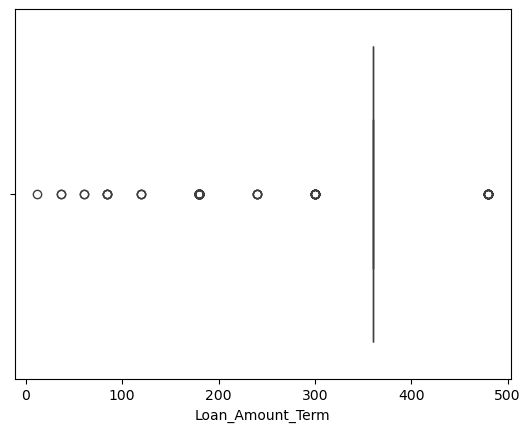

In [108]:
sns.boxplot(x = loan_eligibility_df['Loan_Amount_Term'])
plt.show()

In [109]:
loan_eligibility_df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

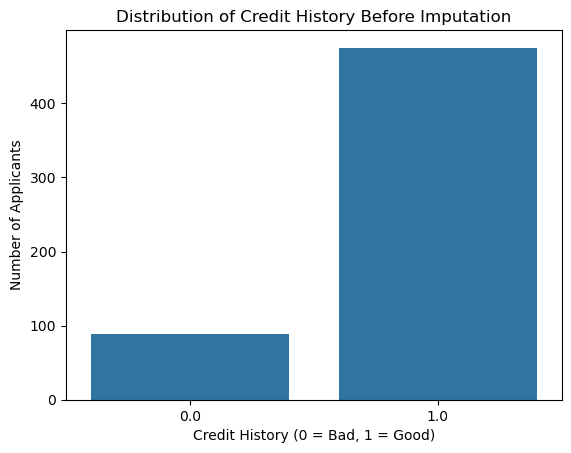

In [110]:
sns.countplot(x='Credit_History', data=loan_eligibility_df)
plt.title("Distribution of Credit History Before Imputation")
plt.xlabel("Credit History (0 = Bad, 1 = Good)")
plt.ylabel("Number of Applicants")
plt.show()

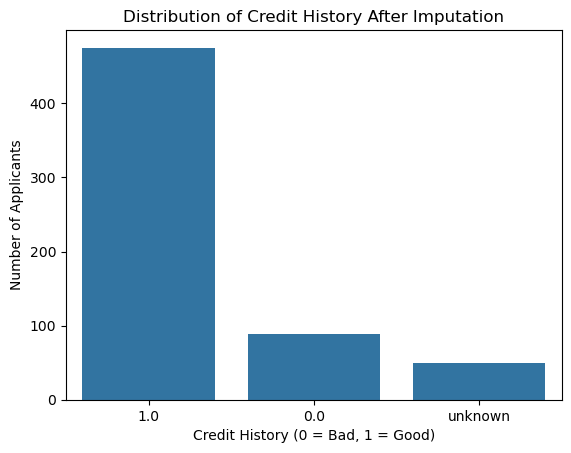

In [111]:
loan_eligibility_df2 = loan_eligibility_df.copy()
loan_eligibility_df2['Credit_History'] = loan_eligibility_df2['Credit_History'].fillna('unknown')
sns.countplot(x='Credit_History', data=loan_eligibility_df2)
plt.title("Distribution of Credit History After Imputation")
plt.xlabel("Credit History (0 = Bad, 1 = Good)")
plt.ylabel("Number of Applicants")
plt.show()

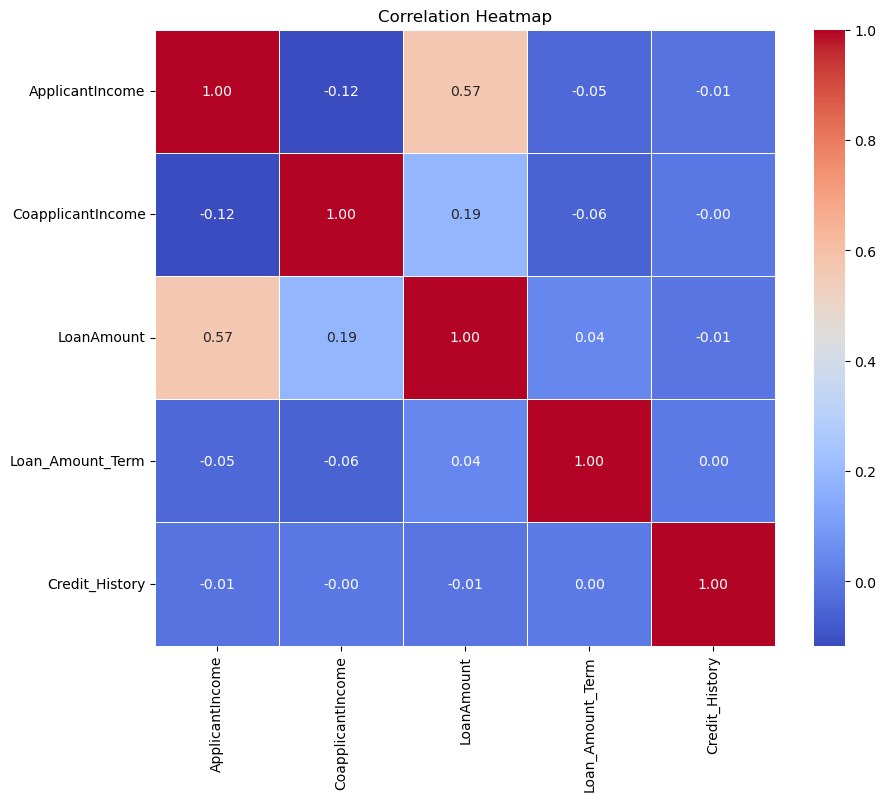

In [112]:
# Select only numeric columns (heatmap works with numbers only)
numeric_df = loan_eligibility_df.select_dtypes(include=['float64', 'int64'])
# 
# Calculate correlation matrix
corr_matrix = numeric_df.corr()
# 
# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [113]:
# 
# Percentage of null values compared to total rows and the solutions
# Gender    --> impute with 'unknown' since they are categorical values
# Married    --> impute with 'unknown' since they are categorical values
# Dependents    --> impute with unknown then we'll use a function to change from string/object to float 
# Self_Employed    --> impute with 'unknown' since they are categorical values
# LoanAmount    --> impute with median because the mean will be distorted toward the outliers
# Loan_Amount_Term    --> impute using the mode amount since the column has fixed values 
# Credit_History    --> impute with 'unknown' because after visualization we noticed that the '1s' are significantly more and wouldn't alter the distribution as much. 

In [114]:
# 
# Impute 'Gender' column with 'unknown'
loan_eligibility_df['Gender'] = loan_eligibility_df['Gender'].fillna('unknown')
# 
# Impute 'Married' column with 'unknown'
loan_eligibility_df['Married'] = loan_eligibility_df['Married'].fillna('unknown')
# 
# Impute 'Dependents' column with 'unknown'
loan_eligibility_df['Dependents'] = loan_eligibility_df['Dependents'].fillna('unknown')
# 
# Impute 'Dependents' column with 'unknown'
loan_eligibility_df['Self_Employed'] = loan_eligibility_df['Self_Employed'].fillna('unknown')
# 
# Impute 'LoanAmount' column with median
loan_eligibility_df['LoanAmount'] = loan_eligibility_df['Self_Employed'].fillna(loan_eligibility_df['LoanAmount'].median())
# 
# Impute 'Loan_Amount_Term' column with mode
loan_eligibility_df['Loan_Amount_Term'] = loan_eligibility_df['Loan_Amount_Term'].fillna(loan_eligibility_df['Loan_Amount_Term'].mode()[0])
# 
# Impute 'Credit_History' column with 'unknown'
loan_eligibility_df['Credit_History'] = loan_eligibility_df['Credit_History'].fillna('unknown')
loan_eligibility_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [115]:
loan_eligibility_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,No,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,No,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,Yes,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,No,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,No,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,No,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,No,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,No,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,No,360.0,1.0,Urban,Y


## 3.2. Drop Loan_ID column

In [116]:
loan_eligibility_df = loan_eligibility_df.drop(['Loan_ID'], axis=1)
loan_eligibility_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,No,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,No,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,Yes,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,No,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,No,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,No,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,No,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,No,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,No,360.0,1.0,Urban,Y


## 3.3.  Convert categorical variables into a suitable format for analysis